In [123]:
from astropy import units as u
from poliastro.bodies import Earth, Sun
from poliastro.twobody import Orbit
from poliastro.plotting import OrbitPlotter3D
import plotly.io as pio
from astropy.coordinates import SkyCoord
import astropy.coordinates as coord
import numpy as np
import matplotlib.pyplot as plt

class satellite:
    def __init__(self, a, ecc, inc, raan, argp, nu, name='UNKNWON SAT'):
        self.orb = Orbit.from_classical(Earth, a, ecc, inc, raan, argp, nu)
        self.name = name
        self.int_clock = 0  # internal clock

    def propagate(self, time):
        self.orb = self.orb.propagate(time * u.s)
        return None

    def skycoord(self):
        sat0x, sat0y, sat0z = self.orb.r
        sat0_sc = SkyCoord(x=sat0x, y=sat0y, z=sat0z, representation_type='cartesian')
        sat0_sc.representation_type = 'spherical'
        sat0_sc.ra.wrap_angle = 180 * u.degree
        sat0_sc.dec.wrap_angle = 90 * u.degree
        return sat0_sc


class ground_station:
    def __init__(self, lat, lon, alt=0, name='UNKNOWN GS'):
        """
        altitude in meters
        """
        self.lat = lat
        self.lon = lon
        self.alt = alt
        self.gs = coord.EarthLocation.from_geodetic(lon=lon*u.degree,
                                                    lat=lat*u.degree)
        self.gs_skycoord = SkyCoord(ra=self.gs.lon,   # ra = longitude
                                    dec=self.gs.lat,  # dec = latitude
                                    distance=6371*u.km + alt*u.m)
        self.name = name
        self.int_clock = 0  # internal clock

    def skycoord(self):
        return self.gs_skycoord

    def propagate(self, time):
        self.lon = (self.lon + time/(24*60*60) * 360) % 360
        self.gs = coord.EarthLocation.from_geodetic(lon=self.lon*u.degree,
                                                    lat=self.lat*u.degree)
        self.gs_skycoord = SkyCoord(ra=self.gs.lon,   # ra = longitude
                                    dec=self.gs.lat,  # dec = latitude
                                    distance=6371*u.km + self.alt*u.m)
        self.gs_skycoord.ra.wrap_angle = 180 * u.degree
        self.gs_skycoord.dec.wrap_angle = 90 * u.degree

    def transmission(self):
        return None



In [124]:
N_constellation = 4
sats = list()

a = 6928 * u.km
ecc = 0 * u.one
inc = 97.59 * u.deg
raan = 270 * u.deg
argp = 0 * u.deg
nu = -180 * u.deg

sats = list()
for i in range(N_constellation):
    sats.append(satellite(a, ecc, inc, raan, argp,
                          nu + 360*i/N_constellation * u.deg,
                          name='PICO'+str(i)))

gs = ground_station(45.5, 10.2, 0, 'Brescia 01')

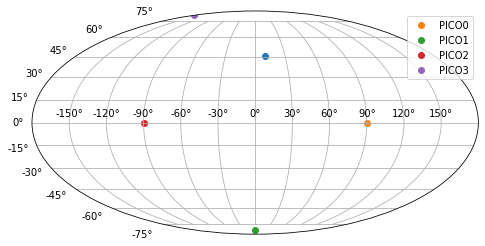

In [125]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(gs.gs.lon.radian, gs.gs.lat.radian)
[ax.scatter(sat.skycoord().ra.radian, sat.skycoord().dec.radian, label=sat.name) for sat in sats ]
# ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
ax.grid(True)
ax.legend()

In [131]:
t_stp = 60*60  # seconds
sim_steps = 24
for stp in range(sim_steps):
    gs.propagate(t_stp)
    for sat in sats:
        sat.propagate(t_stp)
        link_angl = gs.skycoord().separation(sat.skycoord())
        if link_angl <= 70 * u.degree:
            print(f'connection with satellite {sat.name}')

connection with satellite PICO0
connection with satellite PICO1
connection with satellite PICO2
connection with satellite PICO0
connection with satellite PICO3
connection with satellite PICO1
connection with satellite PICO2
connection with satellite PICO3
connection with satellite PICO0
connection with satellite PICO1
connection with satellite PICO2
connection with satellite PICO3
connection with satellite PICO0
connection with satellite PICO1
connection with satellite PICO2
connection with satellite PICO3
connection with satellite PICO0
connection with satellite PICO1
connection with satellite PICO2
connection with satellite PICO0
connection with satellite PICO3
connection with satellite PICO0
connection with satellite PICO1
connection with satellite PICO2
connection with satellite PICO0
connection with satellite PICO3
connection with satellite PICO1
connection with satellite PICO2
connection with satellite PICO3
connection with satellite PICO0
connection with satellite PICO2
connecti

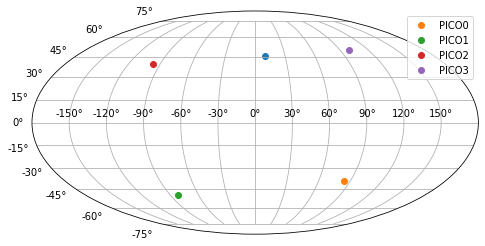

In [132]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(gs.gs.lon.radian, gs.gs.lat.radian)
[ax.scatter(sat.skycoord().ra.radian, sat.skycoord().dec.radian, label=sat.name) for sat in sats ]
# ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
ax.grid(True)
ax.legend()

In [128]:
gs.skycoord()

<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, km)
    (10.2, 45.5, 6371.)>

In [133]:
gs.lon

10.199999999999989